In [1]:
import Pkg
Pkg.add("DynamicalSystems")
Pkg.add("PyPlot")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


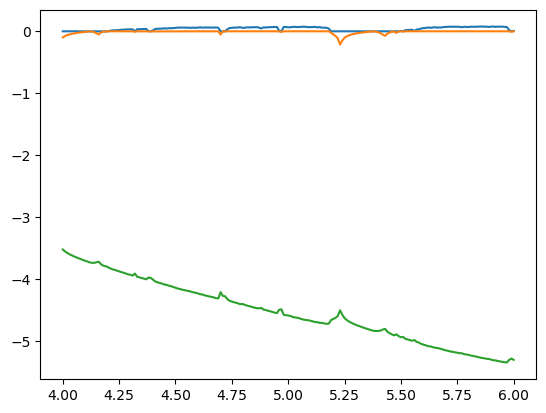

3-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9512f93010>
 PyObject <matplotlib.lines.Line2D object at 0x7f9512f92fe0>
 PyObject <matplotlib.lines.Line2D object at 0x7f9512f93100>

In [2]:
#Lyapunov spectrum of the Rössler system
using DynamicalSystems, PyPlot

function roessler(u, p, t)
    a, b, c = p
    du1 = -u[2]-u[3]
    du2 = u[1] + a*u[2]
    du3 = b + u[3]*(u[1] - c)
    return SVector{3}(du1, du2, du3)
end
ds = ContinuousDynamicalSystem(roessler, [0, 1.0, 0], [0.2, 0.2, 5.7])

cs = 4:0.01:6; λs = zeros(length(cs), 3)
for (i, c) in enumerate(cs)
    set_parameter!(ds, 3, c)
    λs[i, :] .= lyapunovspectrum(ds, 10000; Ttr = 500.0)
end

plot(cs, λs)

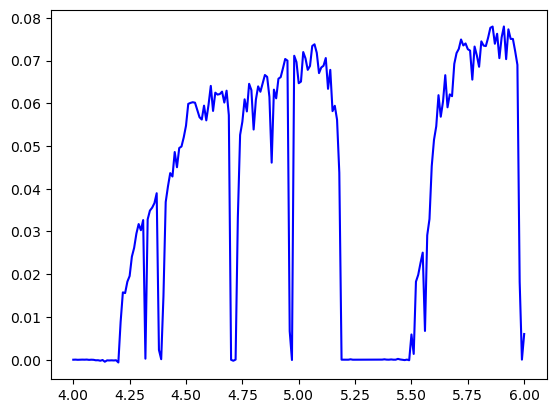

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f95429b1990>

In [3]:
plot(cs,λs[:,1],color=:blue)

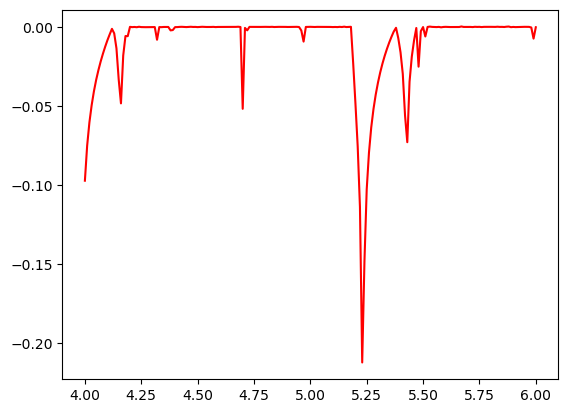

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f953c3237f0>

In [4]:
plot(cs,λs[:,2],color=:red)

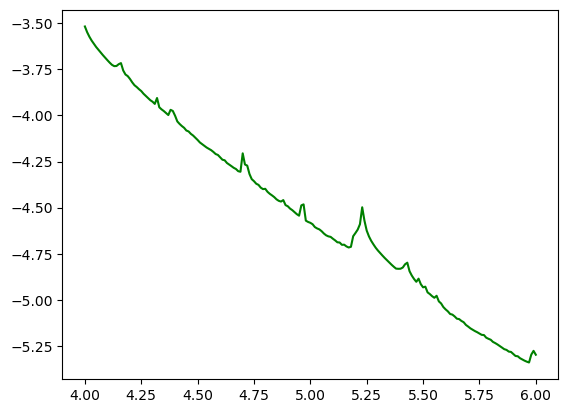

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f953c38bbb0>

In [5]:
plot(cs,λs[:,3],color=:green)